# Info6105 Final Project

### This project is to predict the student grade in secondary education of two Portuguese schools, this dataset is provided regarding the performance of Mathematics. We mainly predict the score for G3, it is the final year grade. G3 and G1,G2 has strong correlation, G1 and G2 are 1st and 2nd year grades.
### We used Linear Regression, Decision Tree and Random Forest to predict the score for G3, and the prediction accuracy is 83.9%, 77.5% and 86%

### Dataset link: https://www.kaggle.com/datasets/dipam7/student-grade-prediction

#### Team members: Jie Nan, Li Xiong, Jialiu Cui

Import the usual libraries for pandas, plotting,sklearn

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import pickle
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Get the data
Use the pandas to read student_mat.csv as a dataframe called data

In [2]:
data = pd.read_csv('/Users/nanjie/Downloads/student-mat.csv')

### Missing Values
make sure that there are no missing values.

In [3]:
# check for null values
data.isnull().values.any()

False

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Exploration
Explore the data to get some insight

cheak out shape,make sure dimension of the data

In [5]:
data.shape

(395, 33)

Type of variables

In [6]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Next we will see some useful standard descriptive statistics for each feature 
including mean, standard deviation, minimum value, maximum value, and range intervals.

In [9]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [11]:
uniques = pd.DataFrame(columns=["Feature", "Uniques", "num_unique"])
for i in range(len(data.columns)):
    uniques.loc[i] = [data.columns[i]] + [data[data.columns[i]].unique()] + [data[data.columns[i]].nunique()]
    

In [12]:
uniques

,Feature,Uniques,num_unique
0,school,"[GP, MS]",2
1,sex,"[F, M]",2
2,age,"[18, 17, 15, 16, 19, 22, 20, 21]",8
3,address,"[U, R]",2
4,famsize,"[GT3, LE3]",2
5,Pstatus,"[A, T]",2
6,Medu,"[4, 1, 3, 2, 0]",5
7,Fedu,"[4, 1, 2, 3, 0]",5
8,Mjob,"[at_home, health, other, services, teacher]",5
9,Fjob,"[teacher, other, services, health, at_home]",5


# Data analysis
In this part,we do some data visualization to better understand the dataset.

In [131]:
#Get the mean score for three periods.
data['mean_periods'] = (data.G1 + data.G2 + data.G3) / 3

(array([10., 17., 33., 43., 76., 73., 62., 52., 16., 13.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <BarContainer object of 10 artists>)

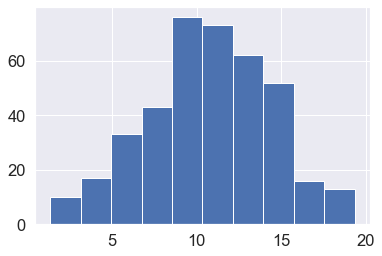

In [132]:
plt.hist(data.mean_periods)

In [133]:
cols_num = list(data.dtypes[data.dtypes == 'int64'].index[0:])

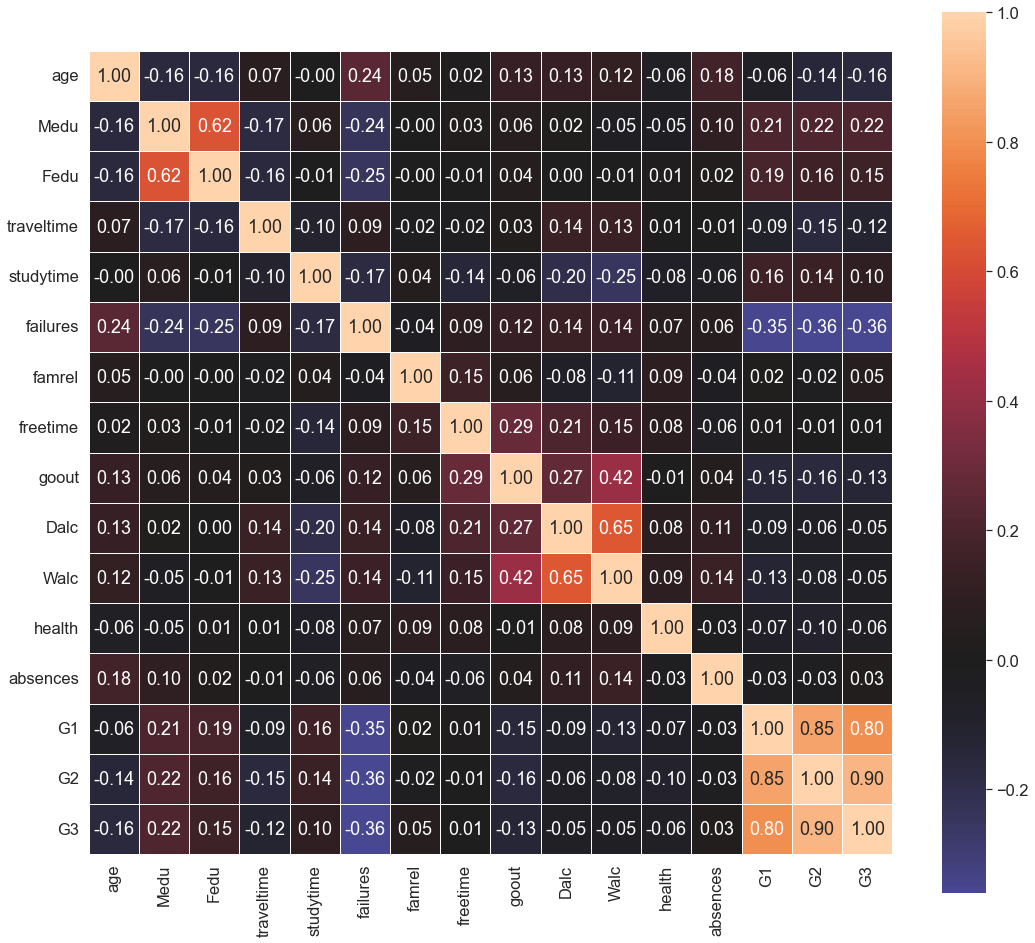

In [134]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .90})
    plt.show();
    
correlation_heatmap(data[cols_num])

Find how dependent and independent features are related to each other

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='G3'>

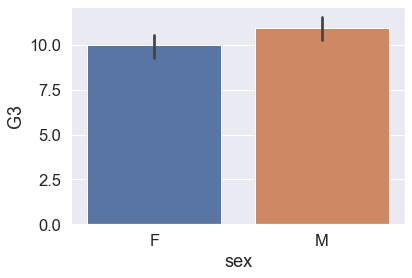

In [135]:
#Male has performed well than female
sns.barplot(data['sex'],data['G3'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G3', ylabel='absences'>

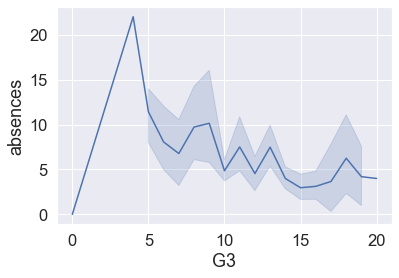

In [136]:
#as absences decreases, the Grade mark increases
sns.lineplot(data['G3'],data['absences'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health', ylabel='absences'>

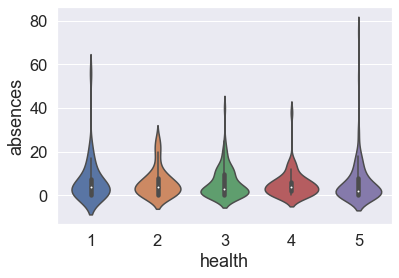

In [137]:
#students who are absent for most of the classes is not for bad health
sns.violinplot(data['health'],data['absences'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='higher', ylabel='count'>

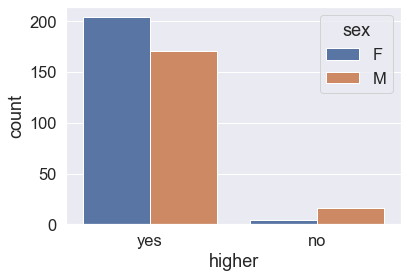

In [138]:
#Most of the students prefer to pursue Higher education.And even females preference was higher than male in pursuing higher education.
sns.countplot(data['higher'],hue=data['sex'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='internet', ylabel='G3'>

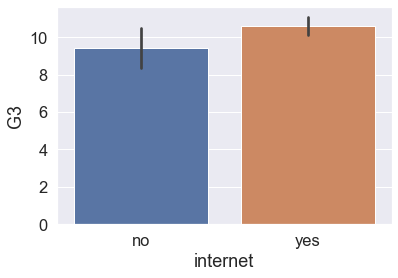

In [139]:
#Students who got internet connection has scored better than the students who does'nt have internet connection.
sns.barplot(data['internet'],data['G3'])

Text(0.5, 0, 'Mother education')

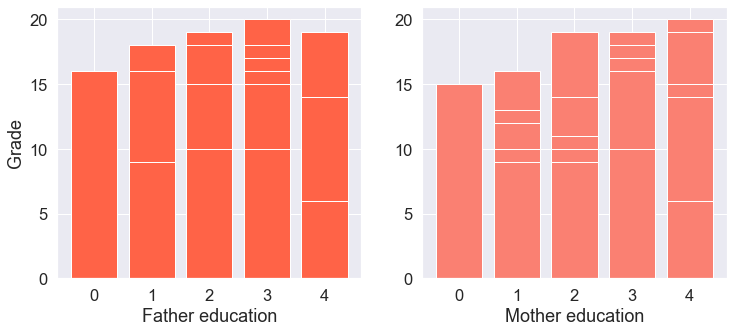

In [140]:
#Father's education does not affects student's grade but for the mothers who are educated their student's grade level 
#got increased.It is because mothers teach their children.
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Fedu'],data['G3'],color='tomato')
ax1.set_xlabel('Father education')
ax1.set_ylabel('Grade')
ax2.bar(data['Medu'],data['G3'],color='salmon')
ax2.set_xlabel('Mother education')

Text(0.5, 0, ' number of past class failures')

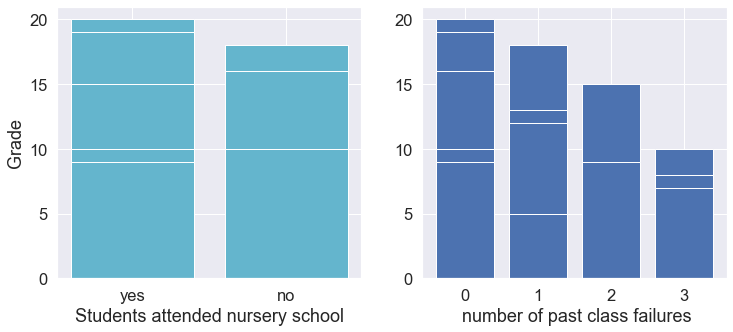

In [141]:
#the students who attended nursery schools have performed well because of their primary Knowledge.
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['nursery'],data['G3'],color='c')
ax1.set_xlabel('Students attended nursery school')
ax1.set_ylabel('Grade')
ax2.bar(data['failures'],data['G3'])
ax2.set_xlabel(' number of past class failures')

Text(0.5, 0, ' weekend alcohol consumption')

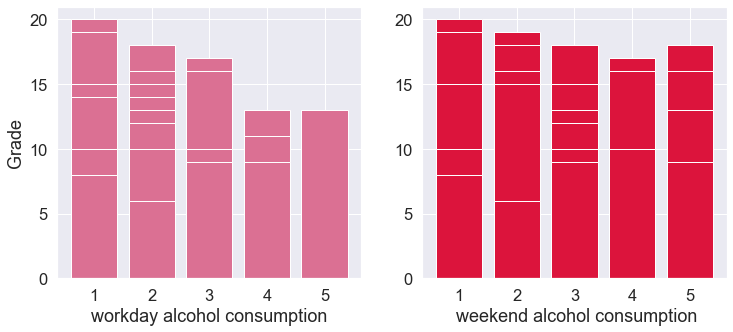

In [142]:
#how alcohol consumption has affected the students grade.
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(data['Dalc'],data['G3'],color='palevioletred')
ax1.set_xlabel(' workday alcohol consumption ') #(numeric: from 1 - very low to 5 - very high)
ax1.set_ylabel('Grade')
ax2.bar(data['Walc'],data['G3'],color='crimson')
ax2.set_xlabel(' weekend alcohol consumption') #(numeric: from 1 - very low to 5 - very high)

# Prediction and Evaluation with difference model

## Linear Regression

### Using Linear Regression to predict the G3 grade

In [ ]:
#pairplot to check the correlation between fileds and it turns out that G1 and G2 are the most correltated with G3
sns.pairplot(data)

In [ ]:
#print the correlation value and it also suggests that G1 and G2 are the most correltated with G3
correlation = data.corr()
correlation

In [ ]:
#print the heatmap
fig = plt.subplots (figsize = (20,20))
sns.set (font_scale = 1.5)
sns.heatmap (data.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

### Creating Training and Test Sets

We split the data set into our training and test sets which will be randomly selected having a 80-20% splt. We will use the training set to train our model, and use our test set as the unseen data that will be a useful final metric to let us know how well our model does.

In [31]:
from sklearn.model_selection import train_test_split
#independent Variable
X = data[['G1', 'G2']]

#dependent variable
y = data['G3']

#Train Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Training a LinearRegression Model
Create an instance of LinearRegression and fit a training data

In [32]:
#create and fit and LinearRegression Model
lr = LinearRegression(normalize = True)

lr.fit(X_train,y_train)

prediction = lr.predict(X_test)

lr.intercept_

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


-1.7528561366106157

Show the prediction
MSE is 3.64 and R2 Score is 0.83

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MSE 3.643124990846217
R2 Score: 83.92094885091775 %


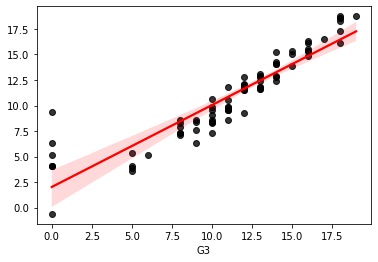

In [8]:
sns.regplot(y_test,prediction,scatter_kws={"color": "black"}, line_kws={"color": "red"})
print('MSE', metrics.mean_squared_error(y_test,prediction))
print('R2 Score:',r2_score(y_test , prediction)*100,'%')

## Decision Tree

### Using Decision Tree to predict the G3 grade.

In [ ]:
data = pd.read_csv('/Users/lixiong/Downloads/student-mat.csv')

In [ ]:
data.columns

In [ ]:
#Calculate the average grade for three scores.
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3
data['GAvg']

In [ ]:
def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= (0.9 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A')
        # else, if more than a value,
        elif row >= (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B')
        # else, if more than a value,
        elif row < (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('C')   
    # Create a column from the list
    df['grades'] = grades
    return df

In [151]:
data = define_grade(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,C


In [152]:
data.drop(["school","age"], axis=1, inplace=True)

In [153]:
data.describe()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


### We need first to convert the catagorical values to numerical values in order to do analysisfor yes / no values:

In [154]:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)
data['famsup'] = data['famsup'].map(d)
data['paid'] = data['paid'].map(d)
data['activities'] = data['activities'].map(d)
data['nursery'] = data['nursery'].map(d)
data['higher'] = data['higher'].map(d)
data['internet'] = data['internet'].map(d)
data['romantic'] = data['romantic'].map(d)

### For other attributes with categorical values

In [155]:
# map the sex data
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)

# map the address data
d = {'U': 1, 'R': 0}
data['address'] = data['address'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
data['famsize'] = data['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
data['Pstatus'] = data['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data['Mjob'] = data['Mjob'].map(d)
data['Fjob'] = data['Fjob'].map(d)

# map the reason data
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data['reason'] = data['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(d)

# map the grades data
d = {'C': 0, 'B': 1, 'A': 2}
data['grades'] = data['grades'].map(d)

In [156]:
data.nunique()

sex            2
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
GAvg          54
grades         3
dtype: int64

### In order to predict grades, we need to remove the grades first.

In [157]:

student_features = data.columns.tolist()
student_features.remove('grades') 
student_features.remove('GAvg') 
student_features.remove('G1') 
student_features.remove('G2') 
student_features.remove('G3') 
student_features

['sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [158]:
#X is other student attributes except the grades
X = data[student_features].copy()
X.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences'],
      dtype='object')

In [159]:
#Y is students' grades
Y=data[['grades']].copy()
Y.columns

Index(['grades'], dtype='object')

### Creating Training and Test Sets

We split the data set into our training and test sets which will be randomly selected having a 90-10% splt. We will use the training set to train our model, and use our test set as the unseen data that will be a useful final metric to let us know how well our model does.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)

### Training a Descision Tree Model
creat an instance of Descision Tree Classifier() and fit it to a training data

In [161]:
#max_leaf_nodes is the number of columns because we need to evaluate every attribute.
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=28, random_state=0)

### Plot a tree and in every node we need to decide whether this attribute is less than a value, if yes, go to next level. And we can also evaluate from gini index, if gini index is smaller than the value, then stop to go to next level. And we prefer to choose the one with smaller gini index.

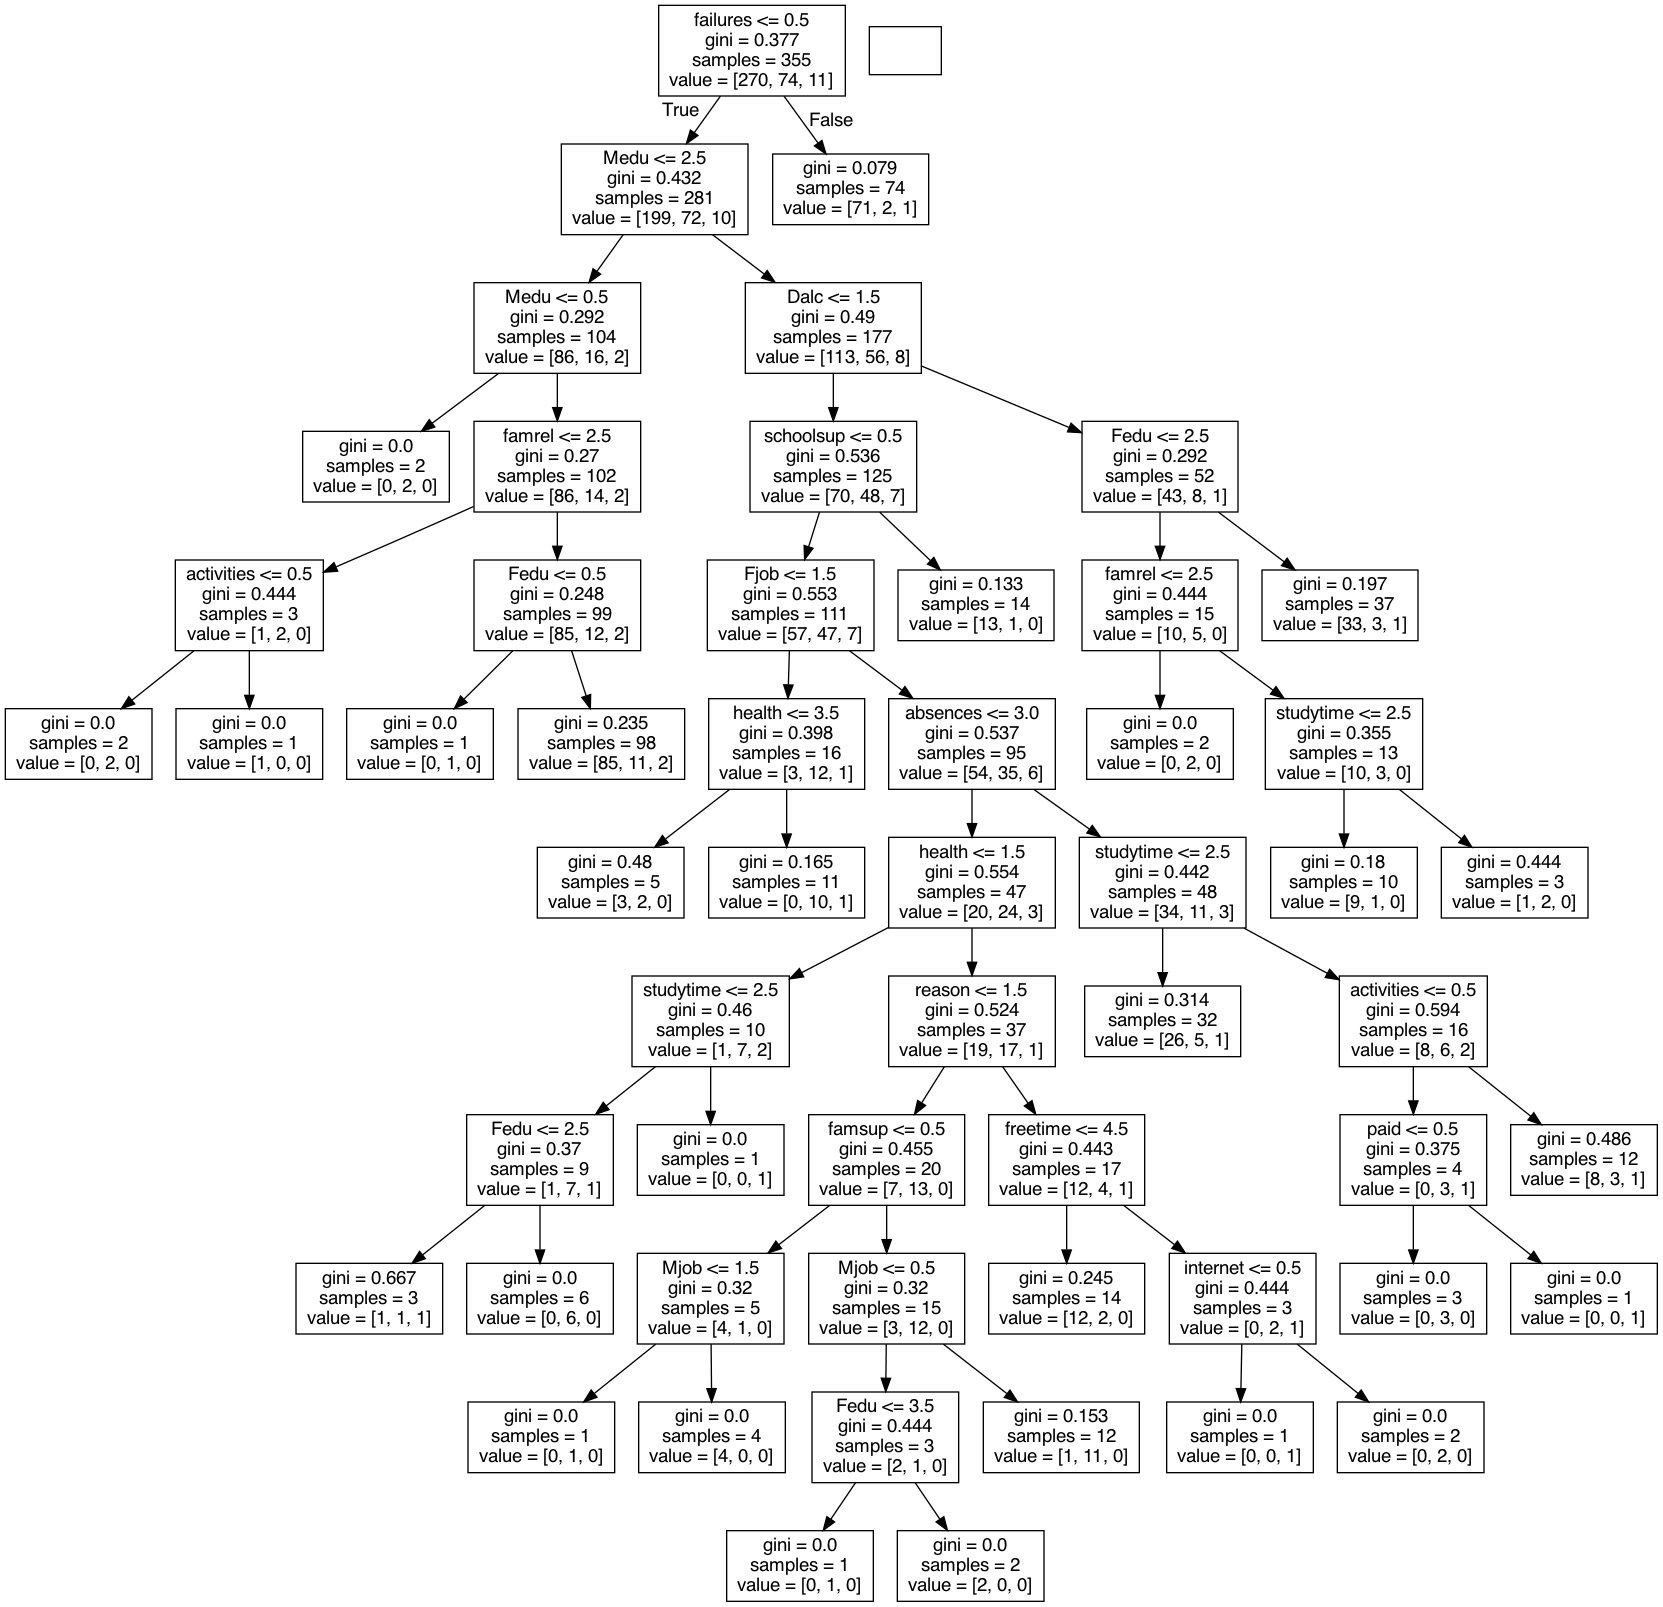

In [162]:
dot_data = StringIO()  
tree.export_graphviz(grade_classifier, out_file=dot_data,  
                         feature_names=student_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [163]:
#prediction
predictions = grade_classifier.predict(X_test)

In [164]:
#measure the accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = predictions)

0.775

## Random Forest

### Creating Training and Test Sets

We split the data set into our training and test sets which will be randomly selected having a 80-20% splt. We will use the training set to train our model, and use our test set as the unseen data that will be a useful final metric to let us know how well our model does.

In [13]:
data = pd.read_csv('/Users/nanjie/Downloads/student-mat.csv')

In [14]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [15]:
categorical = ['school',\
               'sex',\
               'address',\
               'famsize',\
               'Pstatus',\
               'Mjob',\
               'Fjob',\
               'reason',\
               'guardian',\
               'schoolsup',\
               'famsup',\
               'paid',\
               'activities',\
               'nursery',\
               'higher',\
               'internet',\
               'romantic',
                ]

In [16]:
#transform non-numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[categorical] = data[categorical].apply(lambda col: le.fit_transform(col))
data[categorical].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


### First we got a correlation matrix to see the correlation between every attributes, and then we sort them in descending order and we can know the G3 g2 and g1 has high correlation with each other. 

Text(0.5, 1.0, 'Correlation Matrix (Spearman)')

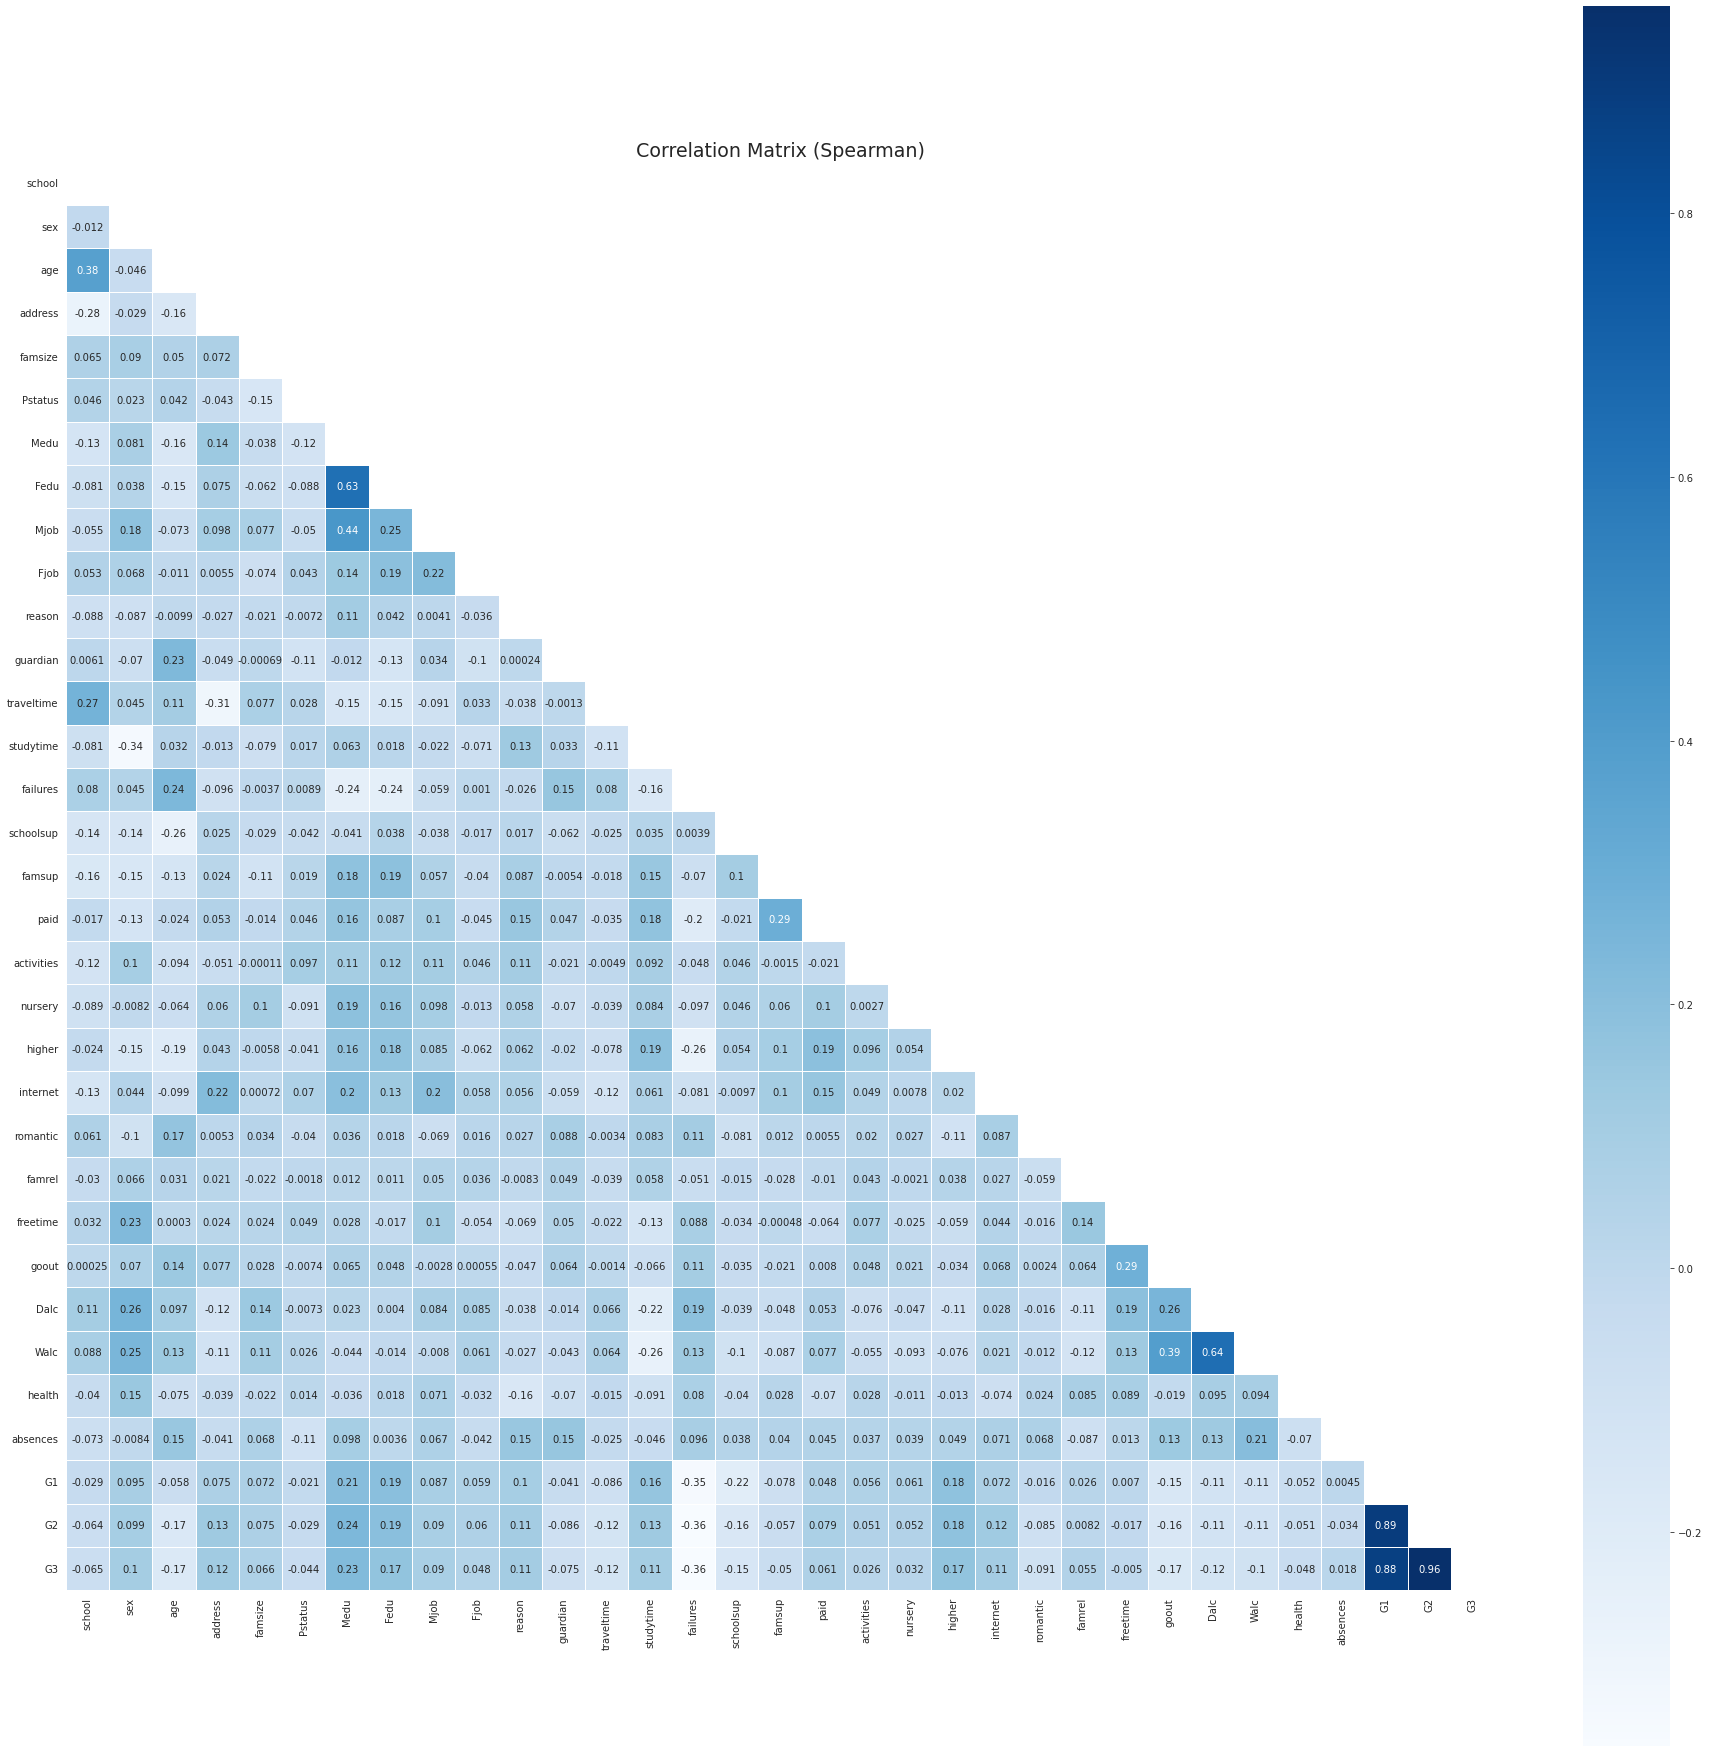

In [17]:
corr = data.corr(method='spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(32, 32))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.6,cmap="Blues",annot=True)
plt.title('Correlation Matrix (Spearman)', size=19)

In [18]:
most_correlated = data.corr().abs()['G3'].sort_values(ascending=False)
most_correlated

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
reason        0.121994
traveltime    0.117142
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
famsize       0.081407
guardian      0.070109
health        0.061335
Pstatus       0.058009
Dalc          0.054660
Walc          0.051939
nursery       0.051568
famrel        0.051363
school        0.045017
Fjob          0.042286
famsup        0.039157
absences      0.034247
activities    0.016100
freetime      0.011307
Name: G3, dtype: float64

In [20]:
X = data.drop('G3', axis=1)
y = data['G3']

In [21]:
chi_scores = chi2(X, y)
chi_scores

(array([ 10.31067797,  10.58166219,   2.27776186,   5.87611299,
         12.4296898 ,   1.71114959,  13.89485215,  10.37556313,
         14.80709871,   5.01367018,  29.72412494,   4.29716283,
          6.75815116,   6.23160348, 140.93489812,  28.31901793,
          5.30343831,  16.1298998 ,   7.60104871,   3.2970835 ,
          1.23447862,   2.99914225,  20.08952572,   2.11068612,
          4.47946459,  10.47249433,  17.08286838,  28.44416652,
         10.17666783, 648.1668477 , 319.71642692, 451.68095212]),
 array([8.90079031e-001, 8.77466915e-001, 9.99990805e-001, 9.93980135e-001,
        7.73448893e-001, 9.99998961e-001, 6.74530494e-001, 8.87127131e-001,
        6.09373865e-001, 9.97731993e-001, 2.84046225e-002, 9.99164900e-001,
        9.86469683e-001, 9.91489433e-001, 1.43606828e-021, 4.13458713e-002,
        9.96775132e-001, 5.14645536e-001, 9.74350267e-001, 9.99863897e-001,
        9.99999920e-001, 9.99930641e-001, 2.69675820e-001, 9.99994819e-001,
        9.98901989e-001, 8.826

### Then we continue to use Chi-squared test to see the  difference between factual value and theoretical value, we got the absences value to be the smallest, so this value is the one that is closest to the the factual value. 

In [22]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values

absences      8.815070e-127
G2             2.751988e-85
G1             9.462563e-58
failures       1.436068e-21
reason         2.840462e-02
Walc           4.000841e-02
schoolsup      4.134587e-02
romantic       2.696758e-01
Dalc           4.487655e-01
paid           5.146455e-01
Mjob           6.093739e-01
Medu           6.745305e-01
famsize        7.734489e-01
sex            8.774669e-01
goout          8.826373e-01
Fedu           8.871271e-01
school         8.900790e-01
health         8.960386e-01
activities     9.743503e-01
traveltime     9.864697e-01
studytime      9.914894e-01
address        9.939801e-01
famsup         9.967751e-01
Fjob           9.977320e-01
freetime       9.989020e-01
guardian       9.991649e-01
nursery        9.998639e-01
internet       9.999306e-01
age            9.999908e-01
famrel         9.999948e-01
Pstatus        9.999990e-01
higher         9.999999e-01
dtype: float64

Text(0.5, 1.0, 'Chi-square test for feature selection')

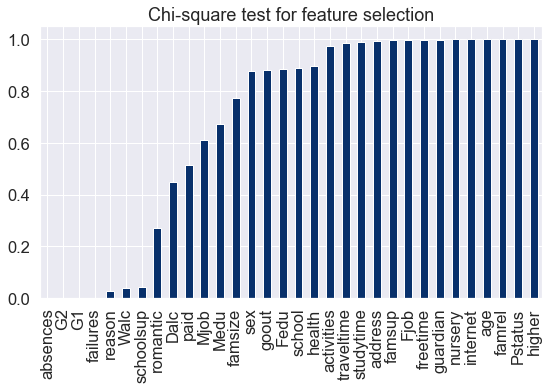

In [158]:
p_values.plot.bar(figsize = (9,5), cmap="Blues_r")
plt.title('Chi-square test for feature selection', size=18) 

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


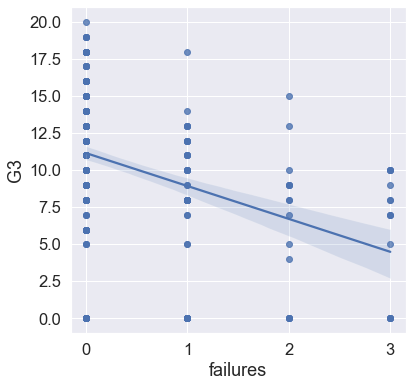

In [160]:
plt.figure(figsize=(6,6))
sns.regplot('failures', 'G3', data=data)
plt.show()

### Training a Random forest Model
create an instance of RandomForestRegressor class and fit it to a training data

In [161]:
data2 = data[['G1', 'G2', 'G3', 'absences']]
X = data2.drop('G3', axis=1) #independent variable 
y = data2['G3'] #dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [162]:
#Then we begin to use random forest regressor to fit a number of classifying decision trees on various sub-samples of 
#the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [163]:
#Save the model
pickle.dump(rf,open("rf_model",'wb'))

In [164]:
#Load the model
rf_loaded = pickle.load(open("rf_model",'rb'))
y_pred1 = rf_loaded.predict(X_test)

### create prediction from test set and get the accuracy of the classifier
Show the prediction

In [165]:
y_pred = rf.predict(X_test)

In [166]:
r2_score(y_test,y_pred)

0.8609126982274837

In [167]:
mean_squared_error(y_test,y_pred)

3.151382630098453

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


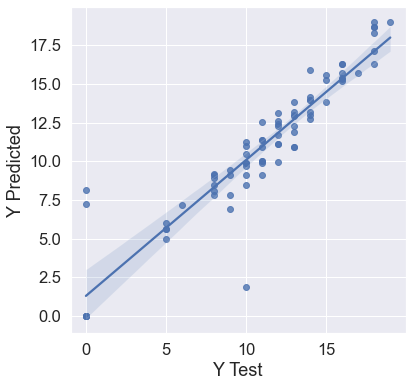

In [168]:
plt.figure(figsize=(6,6))
sns.regplot(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

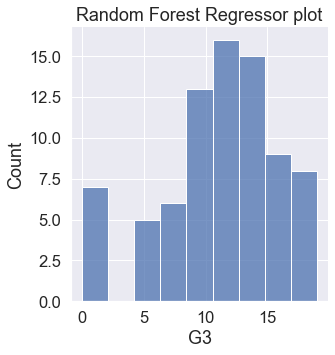

In [181]:
sns.displot(y_test)
plt.title("Random Forest Regressor plot")
plt.show()